# Install Required Libraries

In [1]:
pip install -r Req.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement io (from versions: none)
ERROR: No matching distribution found for io


# Download and Convert CSV to Pandas

In [2]:
import pandas as pd
import requests
import io

url = ["https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_deaths.csv",
"https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_deaths_age.csv",
"https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_inc.csv"]

download_death = requests.get(url[0]).content
df_death = pd.read_csv(io.StringIO(download_death.decode('utf-8')))

download_age = requests.get(url[1]).content
df_age = pd.read_csv(io.StringIO(download_age.decode('utf-8')))

download_inc = requests.get(url[2]).content
df_inc = pd.read_csv(io.StringIO(download_inc.decode('utf-8')))

# Checking the Representation of Dataset

In [3]:
print(df_death.shape)
df_death.head()

(6156, 4)


,Entity,Code,Year,"Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)"
0,Afghanistan,AFG,1990,6.802930
1,Afghanistan,AFG,1991,6.973494
2,Afghanistan,AFG,1992,6.989882
3,Afghanistan,AFG,1993,7.088983
4,Afghanistan,AFG,1994,7.392472


In [4]:
print(df_age.shape)
df_age.head()

(30780, 6)


,Unnamed: 0,entity,code,year,age_group,deaths
0,1,Afghanistan,AFG,1990,Under 5,184.606435
1,2,Afghanistan,AFG,1991,Under 5,191.658193
2,3,Afghanistan,AFG,1992,Under 5,197.140197
3,4,Afghanistan,AFG,1993,Under 5,207.357753
4,5,Afghanistan,AFG,1994,Under 5,226.209363


In [5]:
print(df_inc.shape)
df_inc.head()

(508, 4)


,Entity,Code,Year,"Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)"
0,Afghanistan,AFG,2000,107.100000
1,Afghanistan,AFG,2005,46.500000
2,Afghanistan,AFG,2010,23.900000
3,Afghanistan,AFG,2015,23.600000
4,Algeria,DZA,2000,0.037746


# Check for Missing Data

In [6]:
df_death.isnull().sum()

Entity                                                                                0
Code                                                                                864
Year                                                                                  0
Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)      0
dtype: int64

In [7]:
df_age.isnull().sum()

Unnamed: 0       0
entity           0
code          4320
year             0
age_group        0
deaths           0
dtype: int64

In [8]:
df_inc.isnull().sum()

Entity                                                                                  0
Code                                                                                  108
Year                                                                                    0
Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)      0
dtype: int64

From the above, it can be seen that some titles are upper cased while some are lower cased. There are also repeated words in titles as well. Examples include 'code', 'entity', 'per 1,000 population at risk'. To clean up this process, I would propose to upper case the first character in every word and remove additional words. In my opinion, the datasets are identifiable by the Entity, as such, the 'code' column will be dropped to make the data seem more comprehensive and organised. Some title would also be renamed to be more concise.

# Processing

In [9]:
# Drop unnecessary column for missing data
df_death.drop(['Code'], axis = 1, inplace=True)
df_age.drop(['code', 'Unnamed: 0'], axis = 1, inplace=True)
df_inc.drop(['Code'], axis = 1, inplace=True)

# Rename the last column title
df_death_columns = ['Entity', 'Year', 'Death by malaria of all age and sex (per 100,000 people)']
df_death.columns = df_death_columns

# Titled column title
df_age_columns = ['Entity', 'Year', 'Age Group', 'Deaths']
df_age.columns = df_age_columns

# Remove addition words
df_inc_columns = ['Entity', 'Year', 'Incidence of malaria (per 1,000 population at risk)']
df_inc.columns = df_inc_columns

### Check Representation of Dataset

In [10]:
df_death.head()

,Entity,Year,"Death by malaria of all age and sex (per 100,000 people)"
0,Afghanistan,1990,6.802930
1,Afghanistan,1991,6.973494
2,Afghanistan,1992,6.989882
3,Afghanistan,1993,7.088983
4,Afghanistan,1994,7.392472


In [11]:
df_age.head()

,Entity,Year,Age Group,Deaths
0,Afghanistan,1990,Under 5,184.606435
1,Afghanistan,1991,Under 5,191.658193
2,Afghanistan,1992,Under 5,197.140197
3,Afghanistan,1993,Under 5,207.357753
4,Afghanistan,1994,Under 5,226.209363


In [12]:
   df_inc.head()

,Entity,Year,"Incidence of malaria (per 1,000 population at risk)"
0,Afghanistan,2000,107.100000
1,Afghanistan,2005,46.500000
2,Afghanistan,2010,23.900000
3,Afghanistan,2015,23.600000
4,Algeria,2000,0.037746


# Sending to SQLite3 Database

In [13]:
import sqlite3

conn = sqlite3.connect('malaria.db')
df_death.to_sql('Death', conn, if_exists='replace')
df_age.to_sql('Age', conn, if_exists='replace')
df_inc.to_sql('Incident', conn, if_exists='replace')
conn.close

'''
Example of Retrieval from sql database:

sql_string = 'SELECT * FROM Incident' 
conn = sqlite3.connect('malaria.db')
df_inc = pd.read_sql(sql_string, conn, index_col='index')
conn.close()
'''

"\nExample of Retrieval from sql database:\n\nsql_string = 'SELECT * FROM Incident' \nconn = sqlite3.connect('malaria.db')\ndf_inc = pd.read_sql(sql_string, conn, index_col='index')\nconn.close()\n"

# Informative diagrams

Find the country with the maximum death rate to compare against the general death rate in the world.

### Diagram 1

In [14]:
df_death.loc[df_death['Death by malaria of all age and sex (per 100,000 people)'] == df_death['Death by malaria of all age and sex (per 100,000 people)'].max()]

,Entity,Year,"Death by malaria of all age and sex (per 100,000 people)"
4766,Sierra Leone,2004,229.228881


From the above we can see that Sierra Leone has the highest death rate in 2004. We shall compare Sierra Leone against mean death rate of the whole population of data.

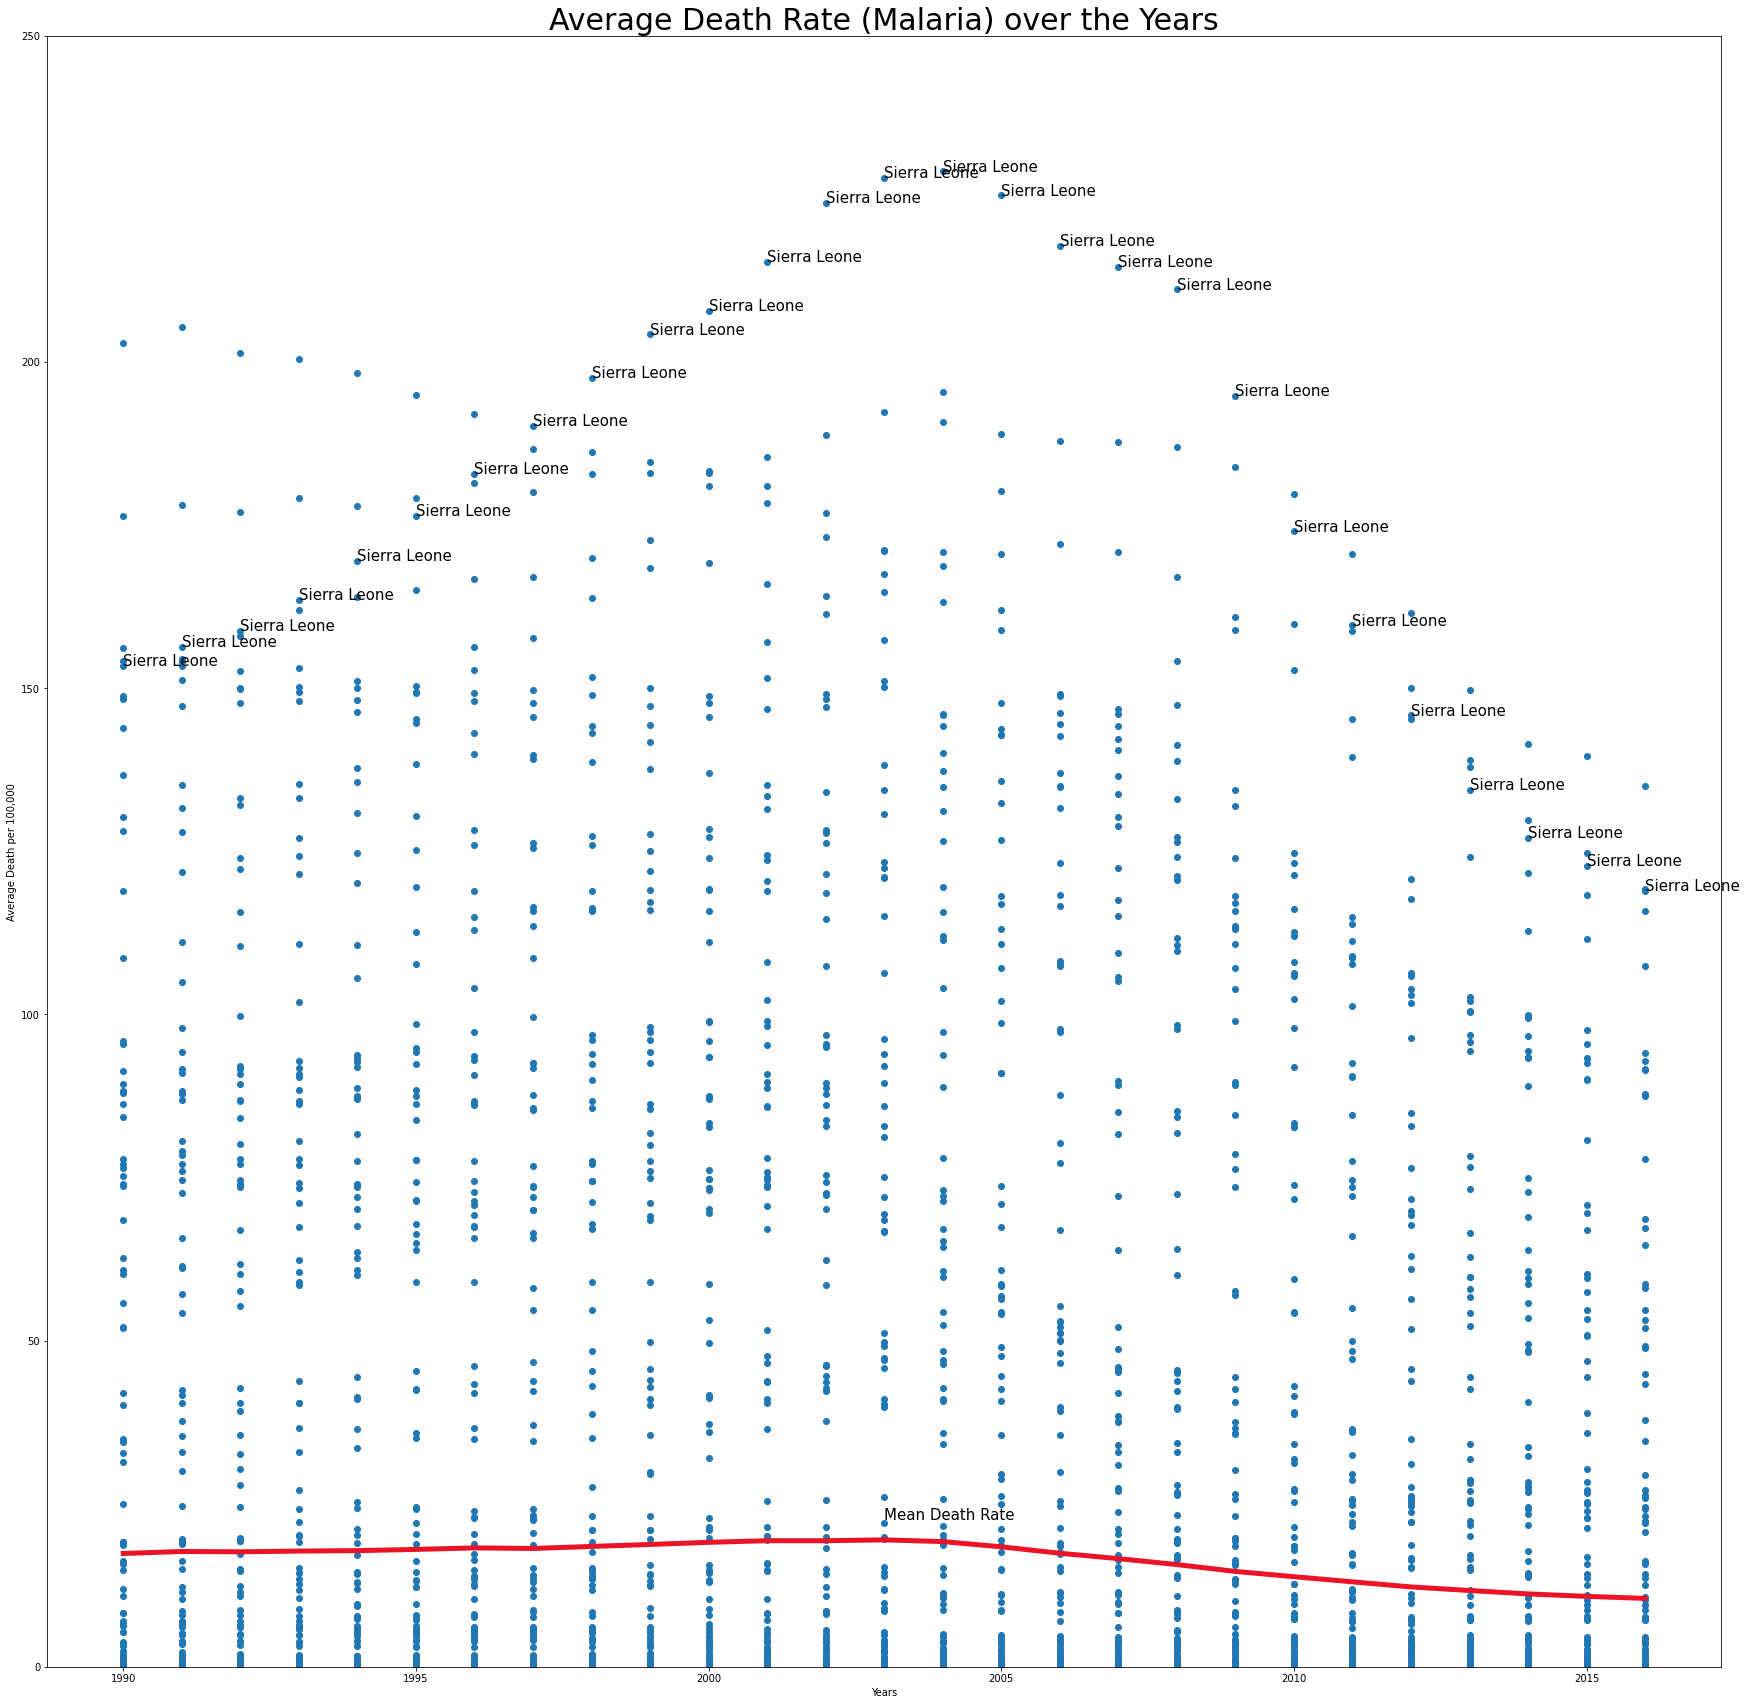

In [15]:
import matplotlib.pyplot as plt

x = df_death['Year'][df_death.Entity == 'Sierra Leone'].values
y = df_death['Death by malaria of all age and sex (per 100,000 people)'][df_death.Entity == 'Sierra Leone'].values
list_value = list(zip(x,y))

df = df_death.groupby(['Year']).mean()

fig, ax = plt.subplots(figsize=(30,30))
ax.set_title('Average Death Rate (Malaria) over the Years', fontsize=30)
ax.set_ylabel('Average Death per 100,000')
ax.set_ylim(0, 250,)
ax.set_xlabel('Years')
ax.plot(df.index, df['Death by malaria of all age and sex (per 100,000 people)'], c='#ec1327', lw=5)

#Annotate Mean Death Rate
ax.annotate('Mean Death Rate', (df.index[int((df['Death by malaria of all age and sex (per 100,000 people)'].count()/2))], df.iloc[int((df['Death by malaria of all age and sex (per 100,000 people)'].count()/2))]+3), fontsize=15)
ax.scatter(df_death.Year, df_death['Death by malaria of all age and sex (per 100,000 people)'])

#Annote Sierra Leone
for i, txt in enumerate(list_value):
    ax.annotate('Sierra Leone', (list_value[i][0], list_value[i][1]), fontsize=15)



The general movement for death rate by malaria per 100,000 shows a slight increase from 1990 to 2003 before have a more significant decrease from 2003 to 2016. Most country are heavily clustered below 50 death. Even though Serria Leone follows the general momentum (Pattern) of the Mean Death Rate, it has a wider fluctuation in terms of death rate over the years as compare to the low fluctuation in the mean death rate. The general movement of the mean death rate over the years may suggest that malaria was first prevalent in 1990 and has spread widely till 2003. The graph may suggest that advancement in medical technology could have halt/cure malaria which led to a decrease in death rate from 2003 to 2016.

### Diagram 2

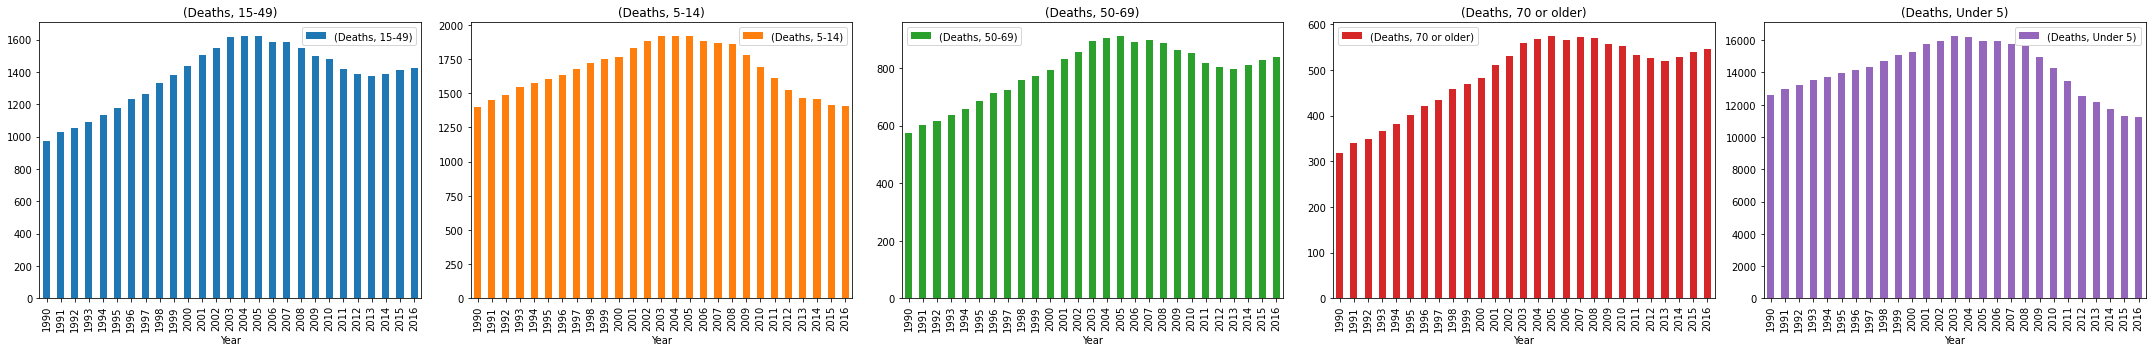

In [16]:
df = df_age.groupby(['Age Group', 'Year']).mean()
df.unstack(0).plot(kind='bar', subplots=True, layout=(1,5), figsize=(30,5))
plt.tight_layout()

It is possible to see that all age group has approximately the same distribution. However, the age group differs in the level of fluctuation as the death rate for age group 5 is significantly higher as compared to all the other age group. This shows that there is a consistent increase of malaria death over the years across all age group but patients patients that are under 5 years of age have a higher mortality rate.

### Diagram 3

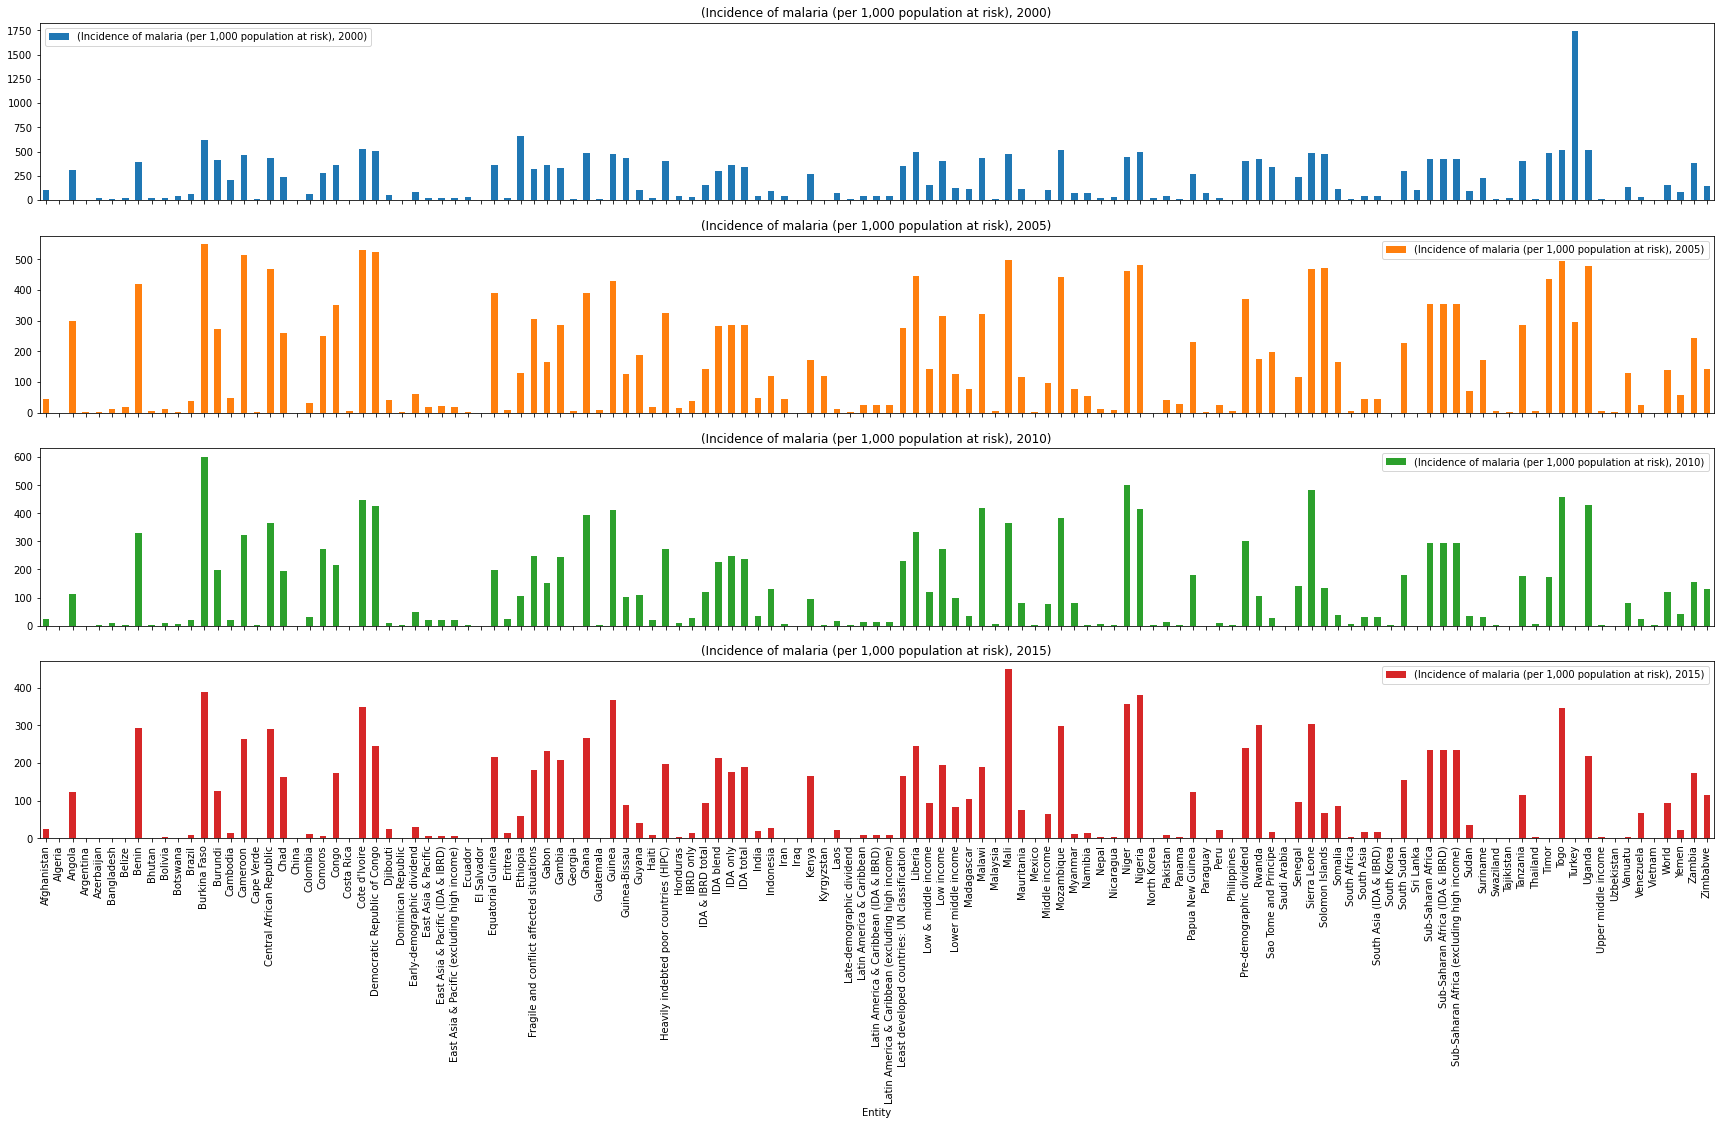

In [17]:
df = df_inc.groupby(['Entity','Year']).sum().unstack(level=1).plot(kind='bar', subplots=True, layout=(4,1), figsize=(30,15))


This allows tracking of the progress of each country from 2000 to 2005 to 2010 to 2015 (Only 4 years was available in dataset).